In [1]:
import numpy as np
import pandas as pd
# matplotlib for plotting
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
from google.cloud import bigquery
from bq_helper import BigQueryHelper
%load_ext google.cloud.bigquery
import os
%matplotlib inline


# For visualization
from bokeh.plotting import figure, output_file, show
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Spectral6, brewer
from bokeh.transform import factor_cmap

os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="My Project-bbdce7b1712b.json"

bq_assistant = BigQueryHelper("bigquery-public-data", "epa_historical_air_quality")


# ANALYZE ONLY FROM JAN 2003 TO DEC 2017

# Analyze CO Daily

In [2]:

query="""
SELECT
        date_local,
        round(avg(aqi),2) as avg_aqi_CO
    FROM
      `bigquery-public-data.epa_historical_air_quality.co_daily_summary`
    WHERE
       state_name ="California" AND city_name="San Francisco"
    GROUP BY date_local
    ORDER BY date_local ASC

"""

df_co_Daily=bq_assistant.query_to_pandas(query)

In [3]:
## Reference https://stackoverflow.com/questions/26763344/convert-pandas-column-to-datetime
df_co_Daily['date_local'] =  pd.to_datetime(df_co_Daily['date_local'], format='%Y-%m-%d')
##df['Date'].dt.strftime('%Y%m%d')


In [4]:
df_co_Daily=df_co_Daily[df_co_Daily['date_local']>='2003-01-01']

In [5]:
df_co_Daily.set_index('date_local',inplace=True)

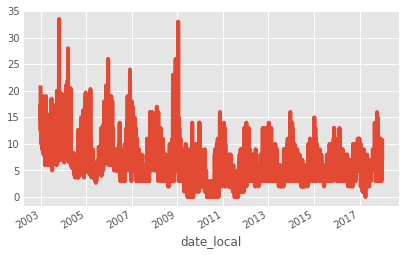

In [6]:
from matplotlib import style
style.use('ggplot')

df_co_Daily['avg_aqi_CO'].plot()

In [7]:
## Reference https://pythonprogramming.net/stock-data-manipulation-python-programming-for-finance/
df_co_Daily['100ma_for_CO'] = df_co_Daily['avg_aqi_CO'].rolling(window=100,min_periods=0).mean()
df_co_Daily.round(2)

df_co_Daily.head(5)

,avg_aqi_CO,100ma_for_CO
date_local,,
2003-01-01,21.0,21.000000
2003-01-02,12.5,16.750000
2003-01-03,16.5,16.666667
2003-01-04,17.0,16.750000
2003-01-05,17.5,16.900000


In [8]:
# ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1,)
# ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1)

# ax1.plot(df_co_Daily.index, df_co_Daily['avg_aqi_CO'])
# ax1.plot(df_co_Daily.index, df_co_Daily['100ma'])

# plt.show()

# Analyze Ozone Daily

In [9]:

query="""
SELECT
        date_local,
        round(avg(aqi),2) as avg_aqi_O3
    FROM
      `bigquery-public-data.epa_historical_air_quality.o3_daily_summary`
    WHERE
       state_name ="California" AND city_name="San Francisco"
    GROUP BY date_local
    ORDER BY date_local ASC

"""

df_o3_Daily=bq_assistant.query_to_pandas(query)
df_o3_Daily['date_local'] =  pd.to_datetime(df_o3_Daily['date_local'], format='%Y-%m-%d')
## filter after 2003
df_o3_Daily=df_o3_Daily[df_o3_Daily['date_local']>='2003-01-01']

df_o3_Daily.set_index('date_local',inplace=True)

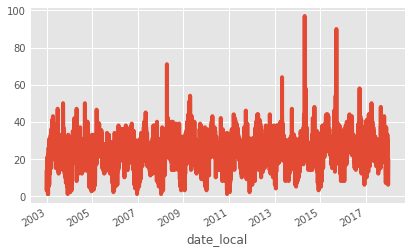

In [10]:
from matplotlib import style
style.use('ggplot')

df_o3_Daily['avg_aqi_O3'].plot()

In [11]:
## Reference https://pythonprogramming.net/stock-data-manipulation-python-programming-for-finance/
df_o3_Daily['100ma_for_Ozone'] = df_o3_Daily['avg_aqi_O3'].rolling(window=100,min_periods=0).mean()
df_o3_Daily.round(2)

df_o3_Daily.head()

,avg_aqi_O3,100ma_for_Ozone
date_local,,
2003-01-01,14.0,14.000000
2003-01-02,3.0,8.500000
2003-01-03,5.0,7.333333
2003-01-04,8.0,7.500000
2003-01-05,13.0,8.600000


# Analyze Nitrogen Dioxide Daily


In [12]:


query="""
SELECT
        date_local,
        round(avg(aqi),2) as avg_aqi_NO2
    FROM
      `bigquery-public-data.epa_historical_air_quality.no2_daily_summary`
    WHERE
       state_name ="California" AND city_name="San Francisco"
    GROUP BY date_local
    ORDER BY date_local ASC

"""

df_no2_Daily=bq_assistant.query_to_pandas(query)
df_no2_Daily['date_local'] =  pd.to_datetime(df_no2_Daily['date_local'], format='%Y-%m-%d')
## filter after 2003
df_no2_Daily=df_no2_Daily[df_no2_Daily['date_local']>='2003-01-01']

df_no2_Daily.set_index('date_local',inplace=True)

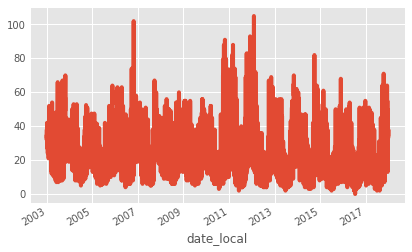

In [13]:
from matplotlib import style
style.use('ggplot')

df_no2_Daily['avg_aqi_NO2'].plot()

In [14]:
## Reference https://pythonprogramming.net/stock-data-manipulation-python-programming-for-finance/
df_no2_Daily['100ma_for_Nitrogen_Dioxide'] = df_no2_Daily['avg_aqi_NO2'].rolling(window=100,min_periods=0).mean()
df_no2_Daily.round(2)

df_no2_Daily.head(5)

,avg_aqi_NO2,100ma_for_Nitrogen_Dioxide
date_local,,
2003-01-01,35.0,35.000000
2003-01-02,32.0,33.500000
2003-01-03,37.0,34.666667
2003-01-04,38.0,35.500000
2003-01-05,33.0,35.000000


# Analyze Sulphur Dioxide Daily

,avg_aqi_SO2,100ma_for_Sulphur_Dioxide
date_local,,
2003-01-01,6.0,6.0
2003-01-02,10.0,8.0
2003-01-03,11.0,9.0
2003-01-04,9.0,9.0
2003-01-05,14.0,10.0


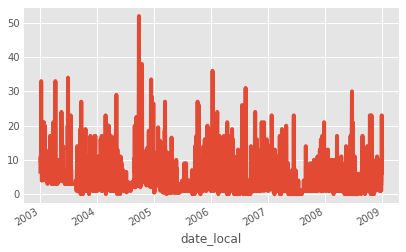

In [15]:
# Analyze Sulphur Dioxide Daily

query="""
SELECT
        date_local,
        round(avg(aqi),2) as avg_aqi_SO2
    FROM
      `bigquery-public-data.epa_historical_air_quality.so2_daily_summary`
    WHERE
       state_name ="California" AND city_name="San Francisco"
    GROUP BY date_local
    ORDER BY date_local ASC

"""

df_so2_Daily=bq_assistant.query_to_pandas(query)
df_so2_Daily['date_local'] =  pd.to_datetime(df_so2_Daily['date_local'], format='%Y-%m-%d')
## filter after 2003
df_so2_Daily=df_so2_Daily[df_so2_Daily['date_local']>='2003-01-01']
df_so2_Daily.set_index('date_local',inplace=True)

from matplotlib import style
style.use('ggplot')

df_so2_Daily['avg_aqi_SO2'].plot()

## Reference https://pythonprogramming.net/stock-data-manipulation-python-programming-for-finance/
df_so2_Daily['100ma_for_Sulphur_Dioxide'] = df_so2_Daily['avg_aqi_SO2'].rolling(window=100,min_periods=0).mean()
df_so2_Daily.round(2)

df_so2_Daily.head()

# Analyze Particulate Matter Daily

,avg_aqi_pm25,100ma_for_PM25
date_local,,
2003-01-01,65.0,65.000000
2003-01-02,64.0,64.500000
2003-01-03,61.0,63.333333
2003-01-04,60.0,62.500000
2003-01-05,70.0,64.000000


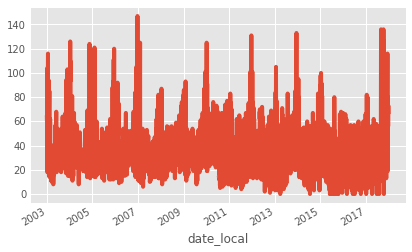

In [16]:
# Analyze Sulphur Dioxide Daily

query="""
SELECT
        date_local,
        round(avg(aqi),2) as avg_aqi_pm25
    FROM
      `bigquery-public-data.epa_historical_air_quality.pm25_frm_daily_summary`
    WHERE
       state_name ="California" AND city_name="San Francisco"
    GROUP BY date_local
    ORDER BY date_local ASC

"""

df_pm25_Daily=bq_assistant.query_to_pandas(query)
df_pm25_Daily['date_local'] =  pd.to_datetime(df_pm25_Daily['date_local'], format='%Y-%m-%d')
## filter after 2003
df_pm25_Daily=df_pm25_Daily[df_pm25_Daily['date_local']>='2003-01-01']
df_pm25_Daily.set_index('date_local',inplace=True)

from matplotlib import style
style.use('ggplot')

df_pm25_Daily['avg_aqi_pm25'].plot()

## Reference https://pythonprogramming.net/stock-data-manipulation-python-programming-for-finance/
df_pm25_Daily['100ma_for_PM25'] = df_pm25_Daily['avg_aqi_pm25'].rolling(window=100,min_periods=0).mean()
df_pm25_Daily.round(2)
df_pm25_Daily.head()

# Analyze SF Crime Daily

In [17]:
# Analyze Sulphur Dioxide Daily

query="""
SELECT CAST(timestamp AS DATE) as date_local,count(distinct unique_key) as no_of_incidents
FROM `bigquery-public-data.san_francisco.sfpd_incidents`
group by date_local
order by date_local asc
"""

df_sfcrimes_Daily=bq_assistant.query_to_pandas(query)


In [18]:
df_sfcrimes_Daily['date_local'] =  pd.to_datetime(df_sfcrimes_Daily['date_local'], format='%Y-%m-%d')
df_sfcrimes_Daily=df_sfcrimes_Daily[df_sfcrimes_Daily['date_local']<='2017-12-31']


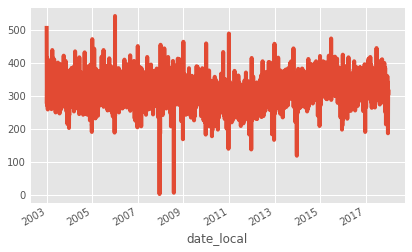

In [19]:
df_sfcrimes_Daily.set_index('date_local',inplace=True)

from matplotlib import style
style.use('ggplot')

df_sfcrimes_Daily['no_of_incidents'].plot()

## Reference https://pythonprogramming.net/stock-data-manipulation-python-programming-for-finance/
# df_sfcrimes_Daily['100ma_for_No_of_Incidents'] = df_sfcrimes_Daily['no_of_incidents'].rolling(window=100,min_periods=0).mean()
# df_sfcrimes_Daily.round(2)

In [20]:
df_sfcrimes_Daily.head()

,no_of_incidents
date_local,
2003-01-01,511
2003-01-02,321
2003-01-03,368
2003-01-04,276
2003-01-05,290


In [21]:
df_co_Daily.shape

(5476, 2)

In [22]:
df_o3_Daily.shape

(5472, 2)

In [23]:
df_no2_Daily.shape

(5465, 2)

In [24]:
df_pm25_Daily.shape

(4153, 2)

In [25]:
df_sfcrimes_Daily.shape

(5478, 1)

In [26]:
## Combine the dataframes ie all
from functools import reduce

df_co_Daily.reset_index(inplace=True)
df_o3_Daily.reset_index(inplace=True)
df_no2_Daily.reset_index(inplace=True)
df_pm25_Daily.reset_index(inplace=True)
df_sfcrimes_Daily.reset_index(inplace=True)

## Reference: https://stackoverflow.com/questions/23668427/pandas-three-way-joining-multiple-dataframes-on-columns
frames=[df_co_Daily,df_o3_Daily,df_no2_Daily,df_sfcrimes_Daily,df_pm25_Daily]
df_final = reduce(lambda left,right: pd.merge(left,right,on='date_local'), frames)


In [27]:
df_final.columns

Index(['date_local', 'avg_aqi_CO', '100ma_for_CO', 'avg_aqi_O3',
       '100ma_for_Ozone', 'avg_aqi_NO2', '100ma_for_Nitrogen_Dioxide',
       'no_of_incidents', 'avg_aqi_pm25', '100ma_for_PM25'],
      dtype='object')

In [28]:
df_final.head()

,date_local,avg_aqi_CO,100ma_for_CO,avg_aqi_O3,100ma_for_Ozone,avg_aqi_NO2,100ma_for_Nitrogen_Dioxide,no_of_incidents,avg_aqi_pm25,100ma_for_PM25
0,2003-01-01,21.0,21.000000,14.0,14.000000,35.0,35.000000,511,65.0,65.000000
1,2003-01-02,12.5,16.750000,3.0,8.500000,32.0,33.500000,321,64.0,64.500000
2,2003-01-03,16.5,16.666667,5.0,7.333333,37.0,34.666667,368,61.0,63.333333
3,2003-01-04,17.0,16.750000,8.0,7.500000,38.0,35.500000,276,60.0,62.500000
4,2003-01-05,17.5,16.900000,13.0,8.600000,33.0,35.000000,290,70.0,64.000000


In [29]:
from sklearn.preprocessing import Imputer

imp=Imputer(missing_values='NaN',strategy='mean')
df_final["avg_aqi_pm25"]=imp.fit_transform(df_final[["avg_aqi_pm25"]]).ravel()

In [30]:
## Optional MinMax Scaling
from sklearn.preprocessing import MinMaxScaler
df_final[['avg_aqi_CO','avg_aqi_O3','avg_aqi_pm25','avg_aqi_NO2']] = MinMaxScaler().fit_transform(df_final[['avg_aqi_CO','avg_aqi_O3','avg_aqi_pm25','avg_aqi_NO2']])


In [31]:
# ## Optional MinMax Scaling
# from sklearn.preprocessing import StandardScaler
# df_final[['avg_aqi_CO','avg_aqi_O3','avg_aqi_pm25','avg_aqi_NO2']] = StandardScaler().fit_transform(df_final[['avg_aqi_CO','avg_aqi_O3','avg_aqi_pm25','avg_aqi_NO2']])
df_final.shape

(4139, 10)

# Finding crimes per capita

In [32]:
import pickle
## Deserialize the pickle object to get back the data frame
picle_in=open('population/dataframe.pickle','rb')
df_pop_per_yr=pickle.load(picle_in)

In [33]:
df_pop_per_yr['year'] = df_pop_per_yr['year'].astype(str).replace('\.0', '', regex=True)

In [34]:
df_final.dtypes

date_local                    datetime64[ns]
avg_aqi_CO                           float64
100ma_for_CO                         float64
avg_aqi_O3                           float64
100ma_for_Ozone                      float64
avg_aqi_NO2                          float64
100ma_for_Nitrogen_Dioxide           float64
no_of_incidents                        int64
avg_aqi_pm25                         float64
100ma_for_PM25                       float64
dtype: object

In [35]:
## Reference https://stackoverflow.com/questions/48295624/extract-year-from-date-column-in-dataframe-having-different-date-format-pyth
df_final['year']=pd.to_datetime(df_final['date_local'], format='%Y-%m-%d').dt.year
df_final['year']=df_final['year'].astype(str)

In [36]:
df_daily=pd.merge(df_final, df_pop_per_yr, how='inner', on='year')

In [37]:
df_daily['Incidents_per_population']=df_daily['no_of_incidents']/df_daily['Population']

In [38]:
df_daily.head()

,date_local,avg_aqi_CO,100ma_for_CO,avg_aqi_O3,100ma_for_Ozone,avg_aqi_NO2,100ma_for_Nitrogen_Dioxide,no_of_incidents,avg_aqi_pm25,100ma_for_PM25,year,Population,Incidents_per_population
0,2003-01-01,0.626866,21.000000,0.135417,14.000000,0.333333,35.000000,511,0.442177,65.000000,2003,766160.0,0.000667
1,2003-01-02,0.373134,16.750000,0.020833,8.500000,0.304762,33.500000,321,0.435374,64.500000,2003,766160.0,0.000419
2,2003-01-03,0.492537,16.666667,0.041667,7.333333,0.352381,34.666667,368,0.414966,63.333333,2003,766160.0,0.000480
3,2003-01-04,0.507463,16.750000,0.072917,7.500000,0.361905,35.500000,276,0.408163,62.500000,2003,766160.0,0.000360
4,2003-01-05,0.522388,16.900000,0.125000,8.600000,0.314286,35.000000,290,0.476190,64.000000,2003,766160.0,0.000379


In [39]:
df_daily[['Incidents_per_population']]=MinMaxScaler().fit_transform(df_daily[['Incidents_per_population']])
## Both the x and ys are on same scale now


# Regression

In [40]:
# # Log transform the target for official scoring
# # REFER https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset
# df_final.no_of_incidents = np.log1p(df_final.no_of_incidents)
df_daily.columns

Index(['date_local', 'avg_aqi_CO', '100ma_for_CO', 'avg_aqi_O3',
       '100ma_for_Ozone', 'avg_aqi_NO2', '100ma_for_Nitrogen_Dioxide',
       'no_of_incidents', 'avg_aqi_pm25', '100ma_for_PM25', 'year',
       'Population', 'Incidents_per_population'],
      dtype='object')

In [41]:
X=df_daily[['avg_aqi_CO','avg_aqi_O3','avg_aqi_pm25','avg_aqi_NO2']]

In [42]:
Y=df_daily['Incidents_per_population']

In [43]:
Y.head()

0    0.947425
1    0.593792
2    0.681269
3    0.510036
4    0.536094
Name: Incidents_per_population, dtype: float64

In [44]:
X.head()

,avg_aqi_CO,avg_aqi_O3,avg_aqi_pm25,avg_aqi_NO2
0,0.626866,0.135417,0.442177,0.333333
1,0.373134,0.020833,0.435374,0.304762
2,0.492537,0.041667,0.414966,0.352381
3,0.507463,0.072917,0.408163,0.361905
4,0.522388,0.125000,0.476190,0.314286


In [45]:
import statsmodels.api as sm


# Note the difference in argument order
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Incidents_per_population   R-squared:                       0.940
Model:                                  OLS   Adj. R-squared:                  0.940
Method:                       Least Squares   F-statistic:                 1.610e+04
Date:                      Sun, 02 Dec 2018   Prob (F-statistic):               0.00
Time:                              01:28:54   Log-Likelihood:                 2485.2
No. Observations:                      4139   AIC:                            -4962.
Df Residuals:                          4135   BIC:                            -4937.
Df Model:                                 4                                         
Covariance Type:                  nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
avg_aqi_CO       0.6422      0.024     26.298      0.000       0.594       0.690
avg_aqi_O3       1.1953      0.014     88.055      0.000       1.169       1.222
avg_aqi_pm25     0.3499      0.016     21.441      0.000       0.318       0.382
avg_aqi_NO2      0.0473      0.020      2.401      0.016       0.009       0.086
==============================================================================
Omnibus:                      350.129   Durbin-Watson:                   0.890
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              986.247
Skew:                          -0.460   Prob(JB):                    6.91e-215
Kurtosis:                       5.208   Cond. No.                         6.74
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
model = lm.fit(X,Y)

predictions = lm.predict(X)
print('Accuracy of model=',lm.score(X,Y))


Accuracy of model= 0.09720887577779214


# Split the Training and Test Set

In [47]:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)


(2897, 4) (2897,)
(1242, 4) (1242,)


# Linear Models

## 1. Linear Regression

In [48]:
# Linear Models

## 1. Linear Regression

# fit a model
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

from sklearn import metrics
                               
print(np.sqrt(metrics.mean_squared_error(y_test, predictions)))


mods=['Linear_Regression']
vals=[]
## Vals contains rmse for test set
vals.append(np.sqrt(metrics.mean_squared_error(y_test, predictions)))

0.06521782813385268


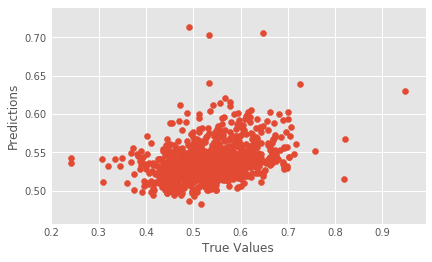

In [49]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel('True Values')
plt.ylabel('Predictions')

## R2 score Evaluation
y_train_pred=model.predict(X_train)
y_test_pred=model.predict(X_test)


In [50]:

from sklearn.metrics import r2_score
from sklearn import metrics

print("r2 train: %.3f, test : %.3f" %(r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred) ))

print('Rmse VAlue is:')
print(np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))


r2 train: 0.092, test : 0.103
Rmse VAlue is:
0.06521782813385268


## Feature Importance in Linear Regression


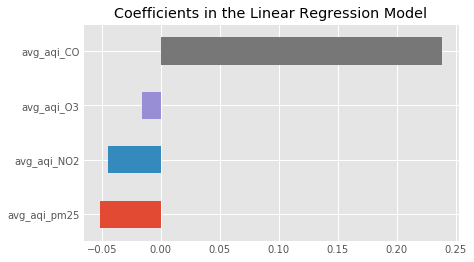

In [51]:
coefs = pd.Series(model.coef_, index = X_train.columns)
imp_coefs = coefs.sort_values().head(10)
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Linear Regression Model")
plt.show()


# 2. Decision Tree Regressor

0.09282231981304481
r2 train: 0.921, test : -0.818


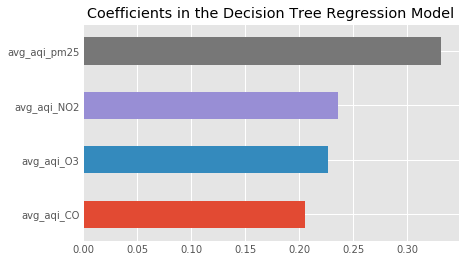

In [52]:

from sklearn.tree import DecisionTreeRegressor

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=324)

regressor = DecisionTreeRegressor(max_depth=20)
regressor.fit(X_train, y_train)

# make predictions on the testing set
y_pred = regressor.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

## R2 score Evaluation
y_train_pred=regressor.predict(X_train)
y_test_pred=regressor.predict(X_test)

from sklearn.metrics import r2_score

print("r2 train: %.3f, test : %.3f" %(r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred) ))

mods.append('Decision_Tree_Regressor')
vals.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred))) 

coefs = pd.Series(regressor.feature_importances_, index = X_train.columns)
imp_coefs = coefs.sort_values().head(10)

imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Decision Tree Regression Model")
plt.show()

## Reference https://www.kaggle.com/apapiu/regularized-linear-models

from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV,Lasso
from sklearn.model_selection import cross_val_score

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)


# 3. Random Forest Regressor


In [53]:

from sklearn.ensemble import RandomForestRegressor

# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

forest=RandomForestRegressor(n_estimators=1000,criterion='mse',random_state=1,n_jobs=-1)
forest.fit(X_train,y_train)

# make predictions on the testing set
y_pred = forest.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


## R2 score Evaluation
y_train_pred=forest.predict(X_train)
y_test_pred=forest.predict(X_test)

from sklearn.metrics import r2_score

print("r2 train: %.3f, test : %.3f" %(r2_score(y_train,y_train_pred),r2_score(y_test,y_test_pred) ))

mods.append('Random Forest Regressor')
vals.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))



0.06839130746975729
r2 train: 0.868, test : 0.013


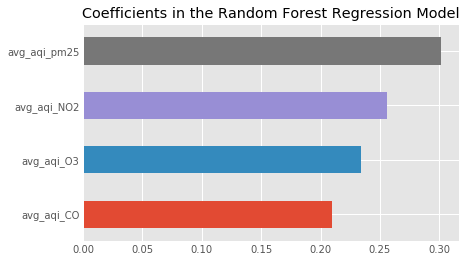

In [54]:
coefs = pd.Series(forest.feature_importances_, index = X_train.columns)
imp_coefs = coefs.sort_values().head(10)

imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Random Forest Regression Model")
plt.show()


# Regularized Linear Models


# 1. Ridge Regression


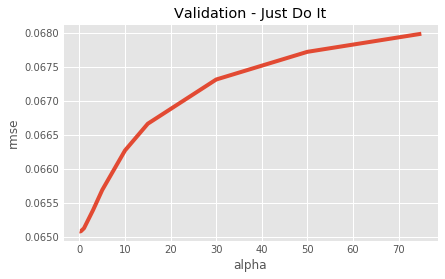

In [55]:

model_ridge = Ridge()
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv_test(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

cv_ridge.min()

mods.append('Ridge Regressor')
vals.append(cv_ridge.min())


Text(0.5,1,'Coefficients in the Ridge Model')

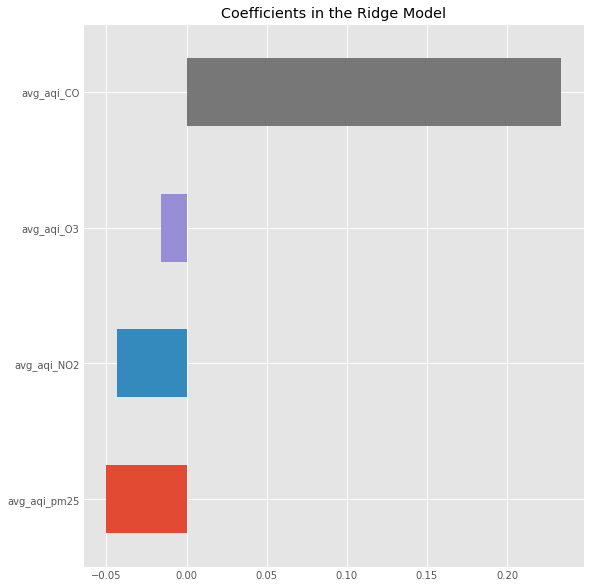

In [56]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

model_ridge=RidgeCV(alphas=alphas)
model_ridge.fit(X_train, y_train)
rmse_cv_test(model_ridge).mean()

coef = pd.Series(model_ridge.coef_, index = X_train.columns)
imp_coef = coef.sort_values().head(10)

matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")

# 2. Lasso Regression


Text(0,0.5,'rmse')

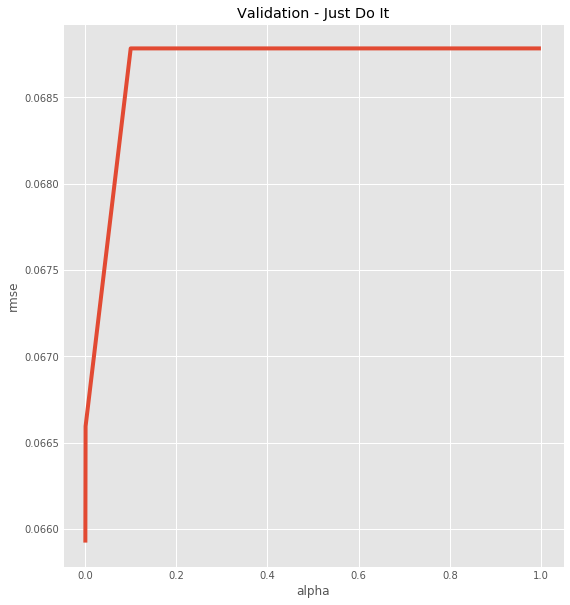

In [57]:

model_lasso = LassoCV()
alphas = [1, 0.1, 0.001, 0.0005]
cv_lasso = [rmse_cv_test(Lasso(alpha = alpha)).mean() 
            for alpha in alphas]

cv_lasso = pd.Series(cv_lasso, index = alphas)
cv_lasso.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

Text(0.5,1,'Coefficients in the Lasso Model')

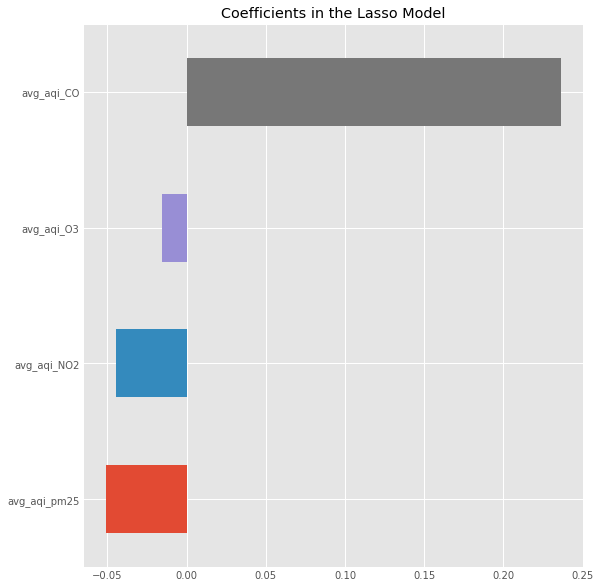

In [58]:
mods.append('Lasso Regressor')
vals.append(rmse_cv_train(model_lasso).min())

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

model_lasso=RidgeCV(alphas=alphas)
model_lasso.fit(X_train, y_train)
rmse_cv_test(model_lasso).mean()

coef = pd.Series(model_lasso.coef_, index = X_train.columns)
imp_coef = coef.sort_values().head(10)
                     
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")


# Compare RMSE of all the 5 models

In [59]:

ser_df=pd.DataFrame({'Model': mods, 'Accuracy_Value': vals})

source = ColumnDataSource(ser_df)

p = figure(x_range=mods, plot_width=900, plot_height=500)
color_map = factor_cmap(field_name='Model', palette=Spectral6, factors=mods)
p.vbar(x='Model', top='Accuracy_Value', source=source, width=0.70, color=color_map)

p.title.text ='Comparison of Models'
p.xaxis.axis_label = 'Model Types'
p.yaxis.axis_label = "RMSE value of different models On Test Set"

show(p)

In [ ]:
# # Reference https://www.kaggle.com/jasonbenner/ridge-regression-cv-tutorial
# # https://www.kaggle.com/jsaadani/simple-ridge-regression-in-python
# from sklearn.model_selection import GridSearchCV

# solverOptions = (['svd', 'cholesky', 'sparse_cg', 'sag'])
# fit_interceptOptions = ([True, False])
# alphas = np.linspace(0,1,30)
# model = Ridge(normalize=True)

# grid = GridSearchCV(estimator=model,param_grid=dict(alpha=alphas,fit_intercept=fit_interceptOptions,
#                                               solver=solverOptions),cv=3,scoring='neg_mean_absolute_error')
# grid.fit(X_train, y_train)

# print ("best grid params: ", grid.best_params_)



In [ ]:
# print('Best score: ',grid.best_score_)

# Other Regression Models

In [60]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X.values)
    rmse= np.sqrt(-cross_val_score(model, X.values, Y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [61]:
## Reference https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard

from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [62]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [63]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.0686 (0.0111)



In [64]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.0685 (0.0111)



In [65]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.0683 (0.0107)



In [66]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.0734 (0.0131)



In [67]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.0702 (0.0136)

